In [3]:
#data paths
pathSmallerUnet = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller'
mix_train = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train'
mix_test = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_test'
mix_val = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_val'

imageTrainData = [] #list that carries all the image properties
imageValidData = [] # list that carries the validation image properties
imageNameDict = {}
trainData1 = [] #list of the train image file path for HGG
trainData2 = []# list of the train image file path for LGG
validData = [] #list of validation image data file 

#do os walk on the main train and validation data file path and load individual image file path 
# dir_listTrain1 = os.listdir(trainDataPath1)
# dir_listTrain2 = os.listdir(trainDataPath2)
dir_listValid = os.listdir(validDataPath)

# trainData1 += dir_listTrain1
# trainData2 += dir_listTrain2
validData += dir_listValid
validData.pop(0)

#reading each image file path and loading it as an image data
#convert the data to image, using image reader
for imageP in trainData1:
  imagePath = trainDataPath1 + '/' + imageP
  image = imread(imagePath)
  imageTrainData.append(image)

for imageP in trainData2:
  imagePath = trainDataPath2 + '/' + imageP
  image = imread(imagePath)
  imageTrainData.append(image)
  
for imageP in validData:
  imagePath = validDataPath + '/' + imageP
  image = imread(imagePath)
  imageValidData.append(image)

print("shape of imageTrainData", np.array(imageTrainData).shape)
print("shape of imageValidData", np.array(imageValidData).shape)

imageNameDict["Train Data"] = imageTrainData
imageNameDict["Valid Data"] = imageValidData
print(imageNameDict)





NameError: ignored

In [ ]:
##Using Emma's code
##Loading in data


training_HGG = r'/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/BRATS2017/Brats17TrainingData/HGG'
training_LGG = r'/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/BRATS2017/Brats17TrainingData/HGG'
test = r'/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/BRATS2017/Brats17TestingData'


'''
Returns a list of all data points
So we end up with list[data points]
'''
#Doesnot work
def get_paths1(pathname):
  paths_list = []
  for rootname, dirnames, filenames in os.walk(pathname):
      for dirname in dirnames:
        if "brats" in dirname:
          paths_list.append(os.path.join(rootname, dirname))
  return paths_list

# paths_train_HGG = get_paths1(training_HGG)
# paths_train_LGG = get_paths1(training_LGG)
# paths_test = get_paths1(test)

def get_path2(pathname):
  paths_list = []
  for rootname, dirnames, filenames in os.walk(pathname):
      for filename in filenames:
        if ".nii" in filename:
          paths_list.append(os.path.join(rootname, filename))
  return paths_list

paths_train_HGG = get_path2(training_HGG)
paths_train_LGG = get_path2(training_LGG)
paths_test = get_path2(test)
print("paths_train_HGG:", len(paths_train_HGG))
print("paths_train_LGG:", len(paths_train_LGG))
print("paths_test:", len(paths_test))



paths_train_HGG: 1260
paths_train_LGG: 1260
paths_test: 584


In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 200 kB/s 


In [ ]:
from numpy.core import machar
class Image:
    def __init__(self, flair, T1, T1c, T2, label):
        self.flair = flair
        self.T1 = T1
        self.T1c = T1c
        self.T2 = T2
        self.label = label

    def to_numpy(self):
      return np.array([self.flair, self.T1, self.T1c, self.T2, self.label])

    def from_numpy(self, np_array):
      self.flair = np_array[0]
      self.T1 = np_array[1]
      self.T1c = np_array[2]
      self.T2 = np_array[3]
      self.label = np_array[4]

In [ ]:
from numpy.core import machar
import SimpleITK as sitk
def process_data(mha_paths):
  data = Image(None, None, None, None, None)
  for mha in mha_paths: #but here the files are not in .mha file format, it is in .nii file formeat
    img = sitk.ReadImage(mha)
    img_arr = sitk.GetArrayFromImage(img)
    if 'more' in mha or 'OT' in mha:
      if data.label is None:
        data.label = img_arr
    elif 'Flair' in mha:
      data.flair = img_arr
    elif 'T1c' in mha:
      data.T1c = img_arr
    elif 'T1' in mha:
      data.T1 = img_arr
    elif 'T2' in mha:
      data.T2 = img_arr
  return data


data1 = process_data(paths_train_HGG)
data2 = process_data(paths_train_LGG)
print(data1.to_numpy().shape)
print(data2.to_numpy().shape)

ModuleNotFoundError: ignored

In [ ]:
#Region based segmentation model
!pip install myshow
from myshow import myshow3D

seed = (132, 142, 96)
seg = sitk.Image(img_T1.getSize())


In [4]:
base_path = "/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data"
'''
batch_name : [0,50]
type: HGG or LGG or mix
split: train, val, test

Returns:
X and y 
'''
def load_data(batch_num, type_GG, split):
    file_name = "{}_{}".format(type_GG, split)
    X_file = "{}_X_{}_{}.npy".format(split, type_GG, batch_num)
    y_file = "{}_y_{}_{}.npy".format(split, type_GG, batch_num)
    X_path = os.path.join(base_path, "Unet_data", file_name, X_file)
    y_path = os.path.join(base_path, "Unet_data", file_name, y_file)

    return np.load(X_path), np.load(y_path)

In [5]:
import os
import numpy as np
X, y = load_data(1, "mix", "val")
print(X.shape)


(4, 84, 240, 240, 3)


TypeError: ignored

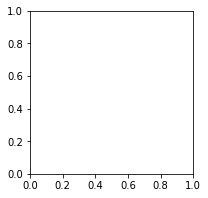

In [6]:
from skimage.filters import sobel
from matplotlib import pyplot as plt
elevation_map = sobel(X)
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
# Text(0.5, 1.0, 'elevation_map')

In [ ]:

#Nov 21st
#Two more segmentation models: Snake, Chan-Vese
#Do snake model

#---Test with one Image---
#Step1: Load the dataset
#Step2: preprocess
#Step3: Apply snake model
#Step4: Do Snake/Chan-Vase
#Step5: Calculate Dice Score
#Step6: Apply the above for all the datasets

In [7]:
#Load the dataset
import torchvision
import torch
from torchvision import transforms
path = r'/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller'
pathSmallerUnet = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller'
mix_train = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train'
mix_test = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_test'
mix_val = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_val'


batch_size = 64
#the lists contains the absolute file path for all the np files
trainPaths  = []
validPaths = []
testPaths = []
import pathlib

for filepath in pathlib.Path(mix_train).glob('**/*'):
    trainPaths.append(filepath.absolute)
for filepath in pathlib.Path(mix_test).glob('**/*'):
    testPaths.append(filepath.absolute)
for filepath in pathlib.Path(mix_val).glob('**/*'):
    validPaths.append(filepath.absolute)

image = trainPaths[0]
print(trainPaths)
# plt.imshow(image)



# def loader(path):
#   arr = imread(path)
#   return arr.astype(np.float32)

# transform = transforms.Compose([transforms.ToTensor()])

# #calculate the mean and std using a sepate function
# #std, mean = calMeanStd() #will write the function

# train_transforms = transforms.Compose([transforms.ToTensor()])
# test_transforms = transforms.Compose([transforms.ToTensor()])

# train_dataset = torchvision.datasets.ImageFolder(root=path, transform = train_transforms, loader = loader)
# #print("T:", train_dataset)
# test_dataset = torchvision.datasets.ImageFolder(root=mix_test, transform = test_transforms, loader = loader)
# valid_dataset = torchvision.datasets.ImageFolder(root=mix_val, transform = transform, loader = loader)

# train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
# valid_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)
# test_loader = torch.utils.data.DataLoader(dataset = valid_dataset, batch_size = batch_size, shuffle = False)

[<bound method Path.absolute of PosixPath('/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train/train_X_mix_0.npy')>, <bound method Path.absolute of PosixPath('/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train/train_y_mix_0.npy')>, <bound method Path.absolute of PosixPath('/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train/train_X_mix_1.npy')>, <bound method Path.absolute of PosixPath('/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train/train_y_mix_1.npy')>, <bound method Path.absolute of PosixPath('/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train/train_X_mix_2.npy')>, <bound method Path.absolute of PosixPath('/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train/train_y_mix_2.npy')>, <bound method Path.absolute of PosixPath('/content/drive/

In [8]:
import os
import numpy as np
base_path = r'/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller'
def load_data(batch_num, type_GG, split):
    file_name = "{}_{}".format(type_GG, split)
    X_file = "{}_X_{}_{}.npy".format(split, type_GG, batch_num)
    y_file = "{}_y_{}_{}.npy".format(split, type_GG, batch_num)
    X_path = os.path.join(base_path, "Unet_data", file_name, X_file)
    y_path = os.path.join(base_path, "Unet_data", file_name, y_file)

    return np.load(X_path), np.load(y_path)

X, y = load_data(0, "mix", "val")

FileNotFoundError: ignored

In [9]:
#testing the snake model

from skimage.filters import gaussian
from skimage.segmentation import active_contour

s = np.linspace(0, 2*np.pi, 100)
c = 220 + 100*np.cos(s)
r  =100 + 100*np.sin(s)
init = np.array([r, c]).T

import skimage.segmentation

snake = active_contour(gaussian(image[0,0,:,:,0], 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

print(snake.shape)
plt.imshow(snake)


TypeError: ignored

In [ ]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
#Doesnt work
import cv2
image = image.astype(np.float32)
ret, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

                                      
# draw contours on the original image
image_copy = image.copy()
pixel_values = np.float32(image_copy)
cv2.drawContours(image=pixel_values, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

error: ignored

From where it matters

Starting Cluster and Edge based segmentation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shape of image: (4, 9, 240, 240, 3)


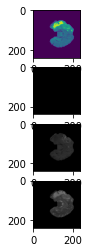

In [9]:

#import required modules
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import numpy as np
import pandas as pd
import skimage
from skimage.io import imread, imshow
from skimage.measure import block_reduce
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import os#the file path has data that's already preprocessed
import os
#modal, sample_num, x, y, rgb_channel

pathSmallerUnet = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller'
mix_train = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_train'
mix_test = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_test'
mix_val = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data/Unet_data_smaller/mix_val'

file_paths = []

for folder, subs, files in os.walk(mix_train):
  for filename in files:
    file_paths.append(os.path.abspath(os.path.join(folder, filename)))
    
# print(file_paths)
#looking at one image
image = np.load(file_paths[0])
print("shape of image:", image.shape)
image.shape
#indexing into each modality
x1 = image[0, 0, :,:,0]
x2 = image[1, 0, :,:,:]
x3 = image[2, 0, :,:,:]
x4 = image[3, 0, :,:,:]
_, ax = plt.subplots(4)
ax[0].imshow(x1)
ax[1].imshow(x2)
ax[2].imshow(x3)
ax[3].imshow(x4)
# print(plt.imshow(image[0, 0, :,:,1]))


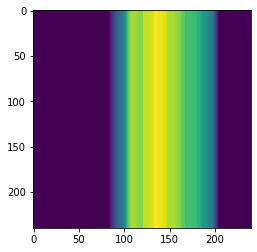

In [2]:
# define stopping criteria
#k means cluster
# print(image.shape)
import numpy as np

pix = np.float32(x1)
# print(plt.imshow(x1))
# print(image.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 1
_, labels, (centers) = cv2.kmeans(pix, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.float32(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# show the image
plt.imshow(segmented_image)
plt.show()

In [3]:
def cluster(im):
    from PIL import Image
    x1 = im.astype(np.float32)
    copy_x1 = x1
    image = x1

    # print("the shape of x1:", x1.shape)
    # print("the gray image:", image.shape)
    # print("printing x1 image b4 anything:")
    # print(plt.imshow(x1))

    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)

    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # number of clusters (K)
    k = 1
    compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert back to 8 bit values
    centers = np.float32(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)

    # show the image
    # print("The segmented image")
    # plt.imshow(segmented_image)
    # plt.show()

    # disable only the cluster number 2 (turn the pixel into black)
    masked_image = np.copy(image)
    # convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
    # color (i.e cluster) to disable
    cluster = 2
    masked_image[labels == cluster] = [0, 0, 0]

    # convert back to original shape
    masked_image = masked_image.reshape(image.shape)

    # show the image
    # print("masked image, converting it back")
    # plt.imshow(masked_image)
    # plt.show()
    return segmented_image


In [4]:
#edge detection segmentation
#with x3 image
def edge(im):
  from skimage.feature import canny
  # print("x2 shape:", x2.shape)
  x2 = im.astype(np.float32)
  #if a channel is not selected, use the following code (if shape is form: x, y, c)
  #if image in form (x,y), uncomment the below line.
  # x2 = cv2.cvtColor(x2, cv2.COLOR_BGR2GRAY)
  # print("gray image:", x2.shape)
  edges = canny(x2)

  fig, ax = plt.subplots(figsize=(4, 3))
  ax.imshow(edges, cmap=plt.cm.gray)
  ax.set_title('Canny detector')
  ax.axis('off')
  return edges

In [5]:
#calculate dice score 
def int_and_union(img, gt): 
    intersection = np.sum(img & gt)
    union = img.size + gt.size
    return intersection, union 

def dice_coef(intersection_arr, union_arr, smooth=1):
  return 2 * (np.sum(intersection_arr) + smooth) / (np.sum(union_arr) + smooth)

In [7]:
base_path = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/data'
cluster_path = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/cluster seg'
edge_path = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/edge seg'
def load_data(batch_num, type_GG, split):
    file_name = "{}_{}".format(type_GG, split)
    X_file = "{}_X_{}_{}.npy".format(split, type_GG, batch_num)
    y_file = "{}_y_{}_{}.npy".format(split, type_GG, batch_num)
    X_path = os.path.join(base_path, "Unet_data_smaller", file_name, X_file)
    y_path = os.path.join(base_path, "Unet_data_smaller", file_name, y_file)

    return np.load(X_path), np.load(y_path)

Real X: (4, 3, 240, 240, 3)
Real y: (4, 3, 240, 240, 3)


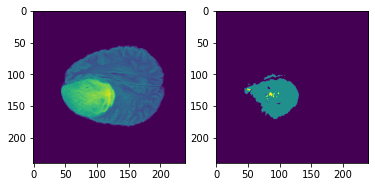

In [13]:
# Visualizing data
X, y = load_data(1, "mix", "val")
print("Real X:", X.shape)
print("Real y:", y.shape)
X = X[:, :, :, :, 0]

y = y[0, :, :, :, 0]
sample_flair_img = X[0, 0, :, :]
label_img = y[0, :, :]
f, ax = plt.subplots(1, 2)
ax[0].imshow(sample_flair_img)
ax[1].imshow(label_img)

In [13]:
# Load in some sample Data 
#Following Emma's brother's code
num_split = 50
for t in ["val", "train"]:
  for i in range(27, num_split):
    print("Running {} cluster for Split {}".format(t, i))
    X, _ = load_data(i, "mix", t)
    X = X[:, :, :, :, 0]
    cluster_X = np.zeros(X.shape)
    for typ in range(X.shape[0]):
      for example in range(X.shape[1]):
        img =  X[typ, example, :, :]
        label_mask = cluster(img)
        cluster_X[typ, example, :, :] = label_mask
    with open(os.path.join(cluster_path, "cluster_{}_{}.npy".format(t, i)), 'wb') as f:
        np.save(f, cluster_X)

Running val cluster for Split 27
Running val cluster for Split 28
Running val cluster for Split 29
Running val cluster for Split 30
Running val cluster for Split 31
Running val cluster for Split 32
Running val cluster for Split 33
Running val cluster for Split 34
Running val cluster for Split 35
Running val cluster for Split 36
Running val cluster for Split 37
Running val cluster for Split 38
Running val cluster for Split 39
Running val cluster for Split 40
Running val cluster for Split 41
Running val cluster for Split 42
Running val cluster for Split 43
Running val cluster for Split 44
Running val cluster for Split 45
Running val cluster for Split 46
Running val cluster for Split 47
Running val cluster for Split 48
Running val cluster for Split 49
Running train cluster for Split 27
Running train cluster for Split 28
Running train cluster for Split 29
Running train cluster for Split 30
Running train cluster for Split 31
Running train cluster for Split 32
Running train cluster for Split

Flair: 0.034522419607553784
T1: 0.034522419607553784
T1c: 0.034522419607553784
T2: 0.034522419607553784


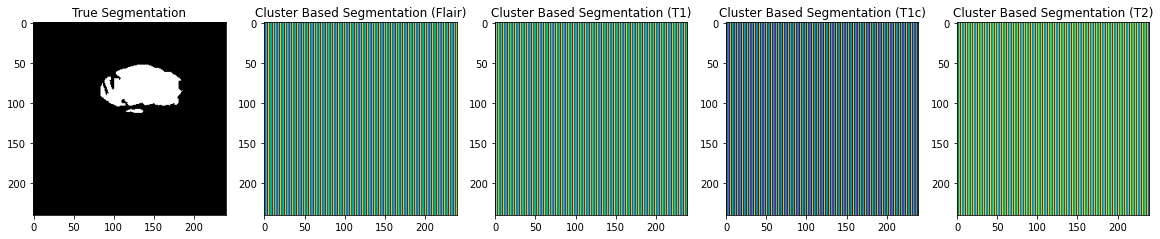

In [15]:
X, y = load_data(3, "mix", "val")
X = X[:, :, :, :, 0]
example_num = 0
img0 =  X[0, example_num, :, :]
img1 =  X[1, example_num, :, :]
img2 =  X[2, example_num, :, :]
img3 =  X[3, example_num, :, :]
label_img = y[0, example_num, :, :]
label_mask0 = cluster(img0)
label_mask1 = cluster(img1)
label_mask2 = cluster(img2)
label_mask3 = cluster(img3)

# xp, yp = seed
f, ax = plt.subplots(1, 5, figsize=(20, 20))
# ax[0].plot(xp, yp, 'rp')
# for i in range(50): 
#   x, y = np.unravel_index(seeds[i], img.shape)
#   ax[0].plot(x, y, 'rp')

ax[0].imshow(label_img)
ax[0].set_title("True Segmentation")
ax[1].imshow(label_mask0)
ax[1].set_title("Cluster Based Segmentation (Flair)")
ax[2].imshow(label_mask1)
ax[2].set_title("Cluster Based Segmentation (T1)")
ax[3].imshow(label_mask2)
ax[3].set_title("Cluster Based Segmentation (T1c)")
ax[4].imshow(label_mask3)
ax[4].set_title("Cluster Based Segmentation (T2)")

intersection, union = int_and_union(label_mask0.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask0.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"Flair: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask1.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask1.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"T1: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask2.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask2.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"T1c: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask3.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask3.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"T2: {dice_coef([intersection, intersection1], [union, union1])}")


In [30]:
X, y = load_data(3, "mix", "val")
print("shape of x:", X.shape)
print("shape of y:", y.shape)

X = X[:, :, :, :, 0]
y = y[:,:,:,:,0]
print("indexed x:", X.shape)
example_num = 3
img0 =  X[0, :, :, :]
print("shape of img0:", img0.shape)
img0 = np.swapaxes(img0, 0,2)
print("img0 shape:", img0.shape)
img1 =  X[1, :, :, :]
img2 =  X[2, :, :, :]
img3 =  X[3, :, :, :]
label_img = y[0, :, :, :]
print("shape of the label_image b4 label swap:", label_img.shape)
label_img = np.swapaxes(label_img, 0,2)
print("shape of label image after ax swap:", label_img.shape)
label_mask0 = cluster(img0)
print("label mask 0 shape:", label_mask0.shape)
# label_mask0 = label_mask0[:,:, 1]

label_mask1 = cluster(img1)
label_mask1 = np.swapaxes(label_mask1, 0,2)
print("label mask 1 shape:", label_mask1.shape)
# label_mask1 = label_mask1[:,:, 1]
# print("trying smth:", label_mask1.shape)

label_mask2 = cluster(img2)
label_mask2 = np.swapaxes(label_mask2, 0,2)
# label_mask2 = label_mask2[:,:, 1]
print("label mask 2 shape:", label_mask2.shape)
label_mask3 = cluster(img3)
label_mask3 = np.swapaxes(label_mask3, 0,2)
print("label mask 3 shape:", label_mask3.shape)
# label_mask3 = label_mask3[:,:, 1]


ax[0].imshow(label_img)
ax[0].set_title("True Segmentation")
ax[1].imshow(label_mask0)
ax[1].set_title("Cluster Based Segmentation (Flair)")
ax[2].imshow(label_mask1)
ax[2].set_title("Cluster Segmentation (T1)")
ax[3].imshow(label_mask2)
ax[3].set_title("Cluster Segmentation (T1c)")
ax[4].imshow(label_mask3)
ax[4].set_title("Cluster Segmentation (T2)")

intersection, union = int_and_union(label_mask0.astype(bool), label_img[:,:,:].astype(bool))
intersection1, union1 = int_and_union(~(label_mask0.astype(bool)), ~(label_img[:,:,:].astype(bool)))
print(f"Flair: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask1.astype(bool), label_img[:,:,:].astype(bool))
intersection1, union1 = int_and_union(~(label_mask1.astype(bool)), ~(label_img[:,:,:].astype(bool)))
print(f"T1: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask2.astype(bool), label_img[:,:,:].astype(bool))
intersection1, union1 = int_and_union(~(label_mask2.astype(bool)), ~(label_img[:,:,:].astype(bool)))
print(f"T1c: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask3.astype(bool), label_img[:,:,:].astype(bool))
intersection1, union1 = int_and_union(~(label_mask3.astype(bool)), ~(label_img[:,:,:].astype(bool)))
print(f"T2: {dice_coef([intersection, intersection1], [union, union1])}")


shape of x: (4, 3, 240, 240, 3)
shape of y: (4, 3, 240, 240, 3)
indexed x: (4, 3, 240, 240)
shape of img0: (3, 240, 240)
img0 shape: (240, 240, 3)
shape of the label_image b4 label swap: (3, 240, 240)
shape of label image after ax swap: (240, 240, 3)
label mask 0 shape: (240, 240, 3)
label mask 1 shape: (240, 240, 3)
label mask 2 shape: (240, 240, 3)
label mask 3 shape: (240, 240, 3)


NameError: ignored

Flair: 0.47140420397480914
T1: 0.476473626416552
T1c: 0.4667340853555323
T2: 0.4630622262924206


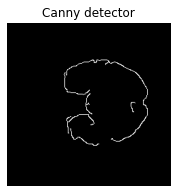

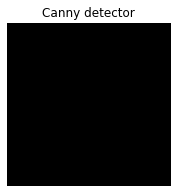

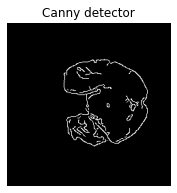

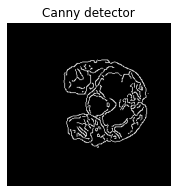

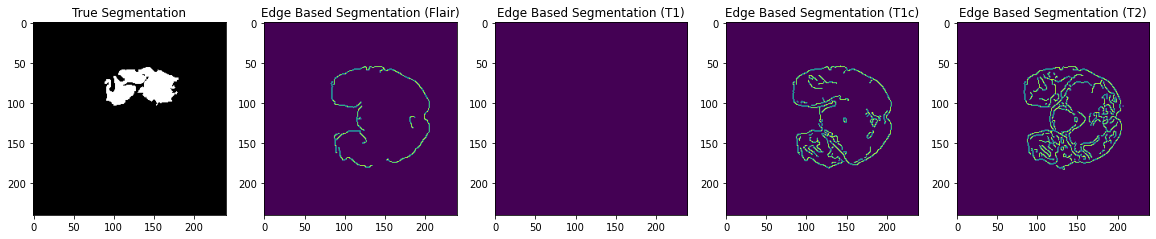

In [19]:
X, y = load_data(3, "mix", "val")
X = X[:, :, :, :, 0]
example_num = 2
img0 =  X[0, example_num, :, :]
img1 =  X[1, example_num, :, :]
img2 =  X[2, example_num, :, :]
img3 =  X[3, example_num, :, :]
label_img = y[0, example_num, :, :]
label_mask0 = edge(img0)
label_mask1 = edge(img1)
label_mask2 = edge(img2)
label_mask3 = edge(img3)

# xp, yp = seed
f, ax = plt.subplots(1, 5, figsize=(20, 20))
# ax[0].plot(xp, yp, 'rp')
# for i in range(50): 
#   x, y = np.unravel_index(seeds[i], img.shape)
#   ax[0].plot(x, y, 'rp')

ax[0].imshow(label_img)
ax[0].set_title("True Segmentation")
ax[1].imshow(label_mask0)
ax[1].set_title("Edge Based Segmentation (Flair)")
ax[2].imshow(label_mask1)
ax[2].set_title("Edge Based Segmentation (T1)")
ax[3].imshow(label_mask2)
ax[3].set_title("Edge Based Segmentation (T1c)")
ax[4].imshow(label_mask3)
ax[4].set_title("Edge Based Segmentation (T2)")

intersection, union = int_and_union(label_mask0.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask0.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"Flair: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask1.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask1.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"T1: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask2.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask2.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"T1c: {dice_coef([intersection, intersection1], [union, union1])}")

intersection, union = int_and_union(label_mask3.astype(bool), label_img[:,:,0].astype(bool))
intersection1, union1 = int_and_union(~(label_mask3.astype(bool)), ~(label_img[:,:,0].astype(bool)))
print(f"T2: {dice_coef([intersection, intersection1], [union, union1])}")


In [ ]:
num_split = 50
import os
cnc_typs = ["flair", "t1", "t1c", "t2"]
for t in ["train", "val", "test"]:
  for i in range(num_split): 
    for k in range(4): 
      _, test_y = load_data(i, "mix", t)
      # for sub in range(0, test_X.shape[0], 25): 
      #   pred_y = model(test_X[sub:max(sub+25, test_X.shape[0])])
      with open(os.path.join(cluster_path, "cluster_{}_{}.npy".format(t, i)), 'rb') as f:
          pred_y = np.load(f)
      test_y = test_y[:,:,:,:,0]
      pred_y = pred_y.astype(bool)[k, :, :, :]
      test_y = test_y.astype(bool)[k, :, :, :]

      intersection, union = int_and_union(pred_y, test_y)
      intersection1, union1 = int_and_union(~pred_y, ~test_y)
      dice2 = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/dice2'

      iu_list = [intersection, intersection1, union, union1]
      names = ["cluster_intersection_{}.npy".format(cnc_typs[k]), "cluster_union_{}.npy".format(cnc_typs[k])]
      iu = [np.array([]), np.array([])]

      for j in range(2): 
        var = names[j]
        fname = os.path.join(dice2, var)
        if os.path.exists(fname):
          with open(fname, 'rb') as f:
            iu[j] = np.load(f)
        iu[j] = np.append(iu[j], iu_list[2 * j])
        iu[j] = np.append(iu[j], iu_list[2 * j + 1])
        with open(fname, 'wb') as f:
            np.save(f, iu[j])

      print("Binary Moving Dice Score at {}_{}_{}: {}".format(cnc_typs[k], t, i, dice_coef(iu[0], iu[1])))

Binary Moving Dice Score at flair_train_0: 0.014117062341443389
Binary Moving Dice Score at t1_train_0: 0.19193217119831513
Binary Moving Dice Score at t1c_train_0: 0.015529168449100291
Binary Moving Dice Score at t2_train_0: 0.015257170034287925
Binary Moving Dice Score at flair_train_1: 0.014158640906133342
Binary Moving Dice Score at t1_train_1: 0.19218455244812777
Binary Moving Dice Score at t1c_train_1: 0.015559598807719607
Binary Moving Dice Score at t2_train_1: 0.01528974774880548
Binary Moving Dice Score at flair_train_2: 0.014343969973928306
Binary Moving Dice Score at t1_train_2: 0.19243877573860535
Binary Moving Dice Score at t1c_train_2: 0.015722701401989968
Binary Moving Dice Score at t2_train_2: 0.015455239320146577
Binary Moving Dice Score at flair_train_3: 0.0143555677638277
Binary Moving Dice Score at t1_train_3: 0.1929445169957034
Binary Moving Dice Score at t1c_train_3: 0.015723611351401708
Binary Moving Dice Score at t2_train_3: 0.01545822261902222
Binary Moving Dic

KeyboardInterrupt: ignored

In [ ]:
# Load in some sample Data 
#Following Emma's brother's code
num_split = 50
for t in ["val", "train"]:
  for i in range(27, num_split):
    print("Running {}  edge for Split {}".format(t, i))
    X, _ = load_data(i, "mix", t)
    X = X[:, :, :, :, 0]
    edge_X = np.zeros(X.shape)
    for typ in range(X.shape[0]):
      for example in range(X.shape[1]):
        img =  X[typ, example, :, :]
        label_mask = edge(img)
        edge_X[typ, example, :, :] = label_mask
    with open(os.path.join(edge_path, "edge_{}_{}.npy".format(t, i)), 'wb') as f:
        np.save(f, edge_X)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
num_split = 50
import os
cnc_typs = ["flair", "t1", "t1c", "t2"]
for t in ["train", "val", "test"]:
  for i in range(27, num_split): 
    for k in range(4): 
      _, test_y = load_data(i, "mix", t)
      # for sub in range(0, test_X.shape[0], 25): 
      #   pred_y = model(test_X[sub:max(sub+25, test_X.shape[0])])
      with open(os.path.join(edge_path, "edge_{}_{}.npy".format(t, i)), 'rb') as f:
          pred_y = np.load(f)
      test_y = test_y[:,:,:,:,0]
      pred_y = pred_y.astype(bool)[k, :, :, :]
      test_y = test_y.astype(bool)[k, :, :, :]

      intersection, union = int_and_union(pred_y, test_y)
      intersection1, union1 = int_and_union(~pred_y, ~test_y)
      dice3 = '/content/drive/MyDrive/Colab Notebooks/Bioimagining Project/dice3'

      iu_list = [intersection, intersection1, union, union1]
      names = ["edge_intersection_{}.npy".format(cnc_typs[k]), "edge_union_{}.npy".format(cnc_typs[k])]
      iu = [np.array([]), np.array([])]

      for j in range(2): 
        var = names[j]
        fname = os.path.join(dice3, var)
        if os.path.exists(fname):
          with open(fname, 'rb') as f:
            iu[j] = np.load(f)
        iu[j] = np.append(iu[j], iu_list[2 * j])
        iu[j] = np.append(iu[j], iu_list[2 * j + 1])
        with open(fname, 'wb') as f:
            np.save(f, iu[j])

      print("Binary Moving Dice Score at {}_{}_{}: {}".format(cnc_typs[k], t, i, dice_coef(iu[0], iu[1])))

Binary Moving Dice Score at flair_train_0: 0.4752794775851285
Binary Moving Dice Score at t1_train_0: 0.48325015275359146
Binary Moving Dice Score at t1c_train_0: 0.4705148193890724
Binary Moving Dice Score at t2_train_0: 0.4716924808581786
Binary Moving Dice Score at flair_train_1: 0.4757165133785413
Binary Moving Dice Score at t1_train_1: 0.48193323641656144
Binary Moving Dice Score at t1c_train_1: 0.46898281515653567
Binary Moving Dice Score at t2_train_1: 0.4718319657040978
Binary Moving Dice Score at flair_train_2: 0.4810439118860081
Binary Moving Dice Score at t1_train_2: 0.48534339043064373
Binary Moving Dice Score at t1c_train_2: 0.47592990799625173
Binary Moving Dice Score at t2_train_2: 0.4769420606275954
Binary Moving Dice Score at flair_train_3: 0.48093811421183735
Binary Moving Dice Score at t1_train_3: 0.485070280774764
Binary Moving Dice Score at t1c_train_3: 0.47625217278176496
Binary Moving Dice Score at t2_train_3: 0.47674852244162635
Binary Moving Dice Score at flair

FileNotFoundError: ignored